# Table of Contents
 <p>

In [241]:
from PIL import Image
from PIL import ImageDraw  
import numpy as np
import noise
import random

# Map tag lines
ports = [
    "Port Tassala",
    "Port Tam",
    "King's Port",
    "Port Mortimer",
    "Port Maven",
    "Blighthaven",
    "Port Nether",
    "Port Glas",
    "Stormguard",
    "Port Cairn",
    "Cadwyn",
    "Fleetwood"
]

# Map colours
very_dark_blue = [0,0,89, 255]
dark_blue = [0,0,139, 255] 
blue = [65,105,225, 255]
light_blue = [135,206,250, 255]
green = [34,139,34, 255]
dark_green = [0,100,0, 255]
sandy = [210,180,140, 255]
beach = [238, 214, 175, 255]
snow = [255, 250, 250, 255]
mountain = [139, 137, 137, 255]
gravel = [83,84,78, 255]
dark_gravel = [95,95,90, 255]
light_gravel = [117, 118, 113, 255]
wheat =[245,222,179, 255]


shape = (1024,1024)
scale = 300.0
octaves = 6
persistence = 0.5
lacunarity = 2.0

pixels = [
    [ [0,0,0, 255] for i in range(0, shape[0])] for i in range(0, shape[1])
]


lst = []
for i in range(shape[0]):
    for j in range(shape[1]):
        n = noise.pnoise2(i/scale, 
                                    j/scale+3, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=1024, 
                                    repeaty=1024, 
                                    base=0)
        lst.append(n)

a = np.asarray(lst)
b = np.interp(a, (a.min(), a.max()), (0, +1))

beach_coords = []
forrest_coords = []

for i in range(shape[0]):
    for j in range(shape[1]):
        i = i
        j = j
        ind = j+(i * shape[0])
        
        n = b[ind]
        
        if (n < 0.25):
            n = very_dark_blue
        elif (n < 0.45):
            n = dark_blue
        elif (n < 0.54):
            n = blue
        elif (n < 0.55):
            n = light_blue
            beach_coords.append([i,j])
        elif (n < 0.56 ):
            n = sandy
        elif (n < 0.57 ):
            n = beach
        #elif (n < 0.65):
        #    n = green
        #elif (n < 0.68):
        #    n = wheat
        elif (n < 0.65):
            n = green
        elif (n < 0.75):
            n = dark_green
            forrest_coords.append([i,j])
        elif (n < 0.77):
            n = gravel
        elif (n < 0.80):
            n = dark_gravel
        elif (n < 0.83):
            n = light_gravel
        elif (n < 0.88):
            n = mountain
        elif (n <= 1.0):
            n = snow
        
        pixels[i][j] = n
        

# Convert the pixels into an array using numpy
array = np.array(pixels, dtype=np.uint8)

# Use PIL to create an image from the new array of pixels
new_image = Image.fromarray(array, 'RGBA')#.resize((100, 100))

print(new_image.size)
print('___')

marker = Image.open('shield_sign_anchor.png', 'r')
ruin = Image.open('ruin.png', 'r')
tower = Image.open('tower.png', 'r')
#tagline = Image.open('name_tag_bg.png', 'r')

used_offsets = []
used_names = []
for i in range(10):
    # ToDo Check Distances so Markers do not overlap
    offset = getRandomCoord(beach_coords, 1024, 1024, 40)
    print(i, ">> ",offset[1],offset[0])
    # x, y
    #Third arg enables transparency
    new_image.paste(marker, (offset[1],offset[0]), marker)
    #new_image.paste(tagline, (offset[1]-15,offset[0]+30))
    draw = ImageDraw.Draw(new_image)
    name_tag = random.choice(ports)
    #name_tag = str(i)
    textsize = draw.textsize(name_tag)
    draw.rectangle((offset[1]+15-(textsize[0]*0.5)-2,offset[0]+30, offset[1]+15-(textsize[0]*0.5)+textsize[0]+2,offset[0]+30+textsize[1]+3), outline='black', fill='white')
    draw.text((offset[1]+15-(textsize[0]*0.5),offset[0]+32), name_tag, fill='black')
    used_offsets.append(offset)

for i in range(3):
    # ToDo Check Distances so Markers do not overlap
    offset = getRandomCoord(forrest_coords, 1024, 1024, 40)
    # x, y
    #Third arg enables transparency
    new_image.paste(tower, (offset[1]-15,offset[0]-15), tower)
    used_offsets.append(offset)
    
new_image.save('interpolated_4.png')
new_image.show('interpolated_4.png')

(1024, 1024)
___
# 953 433
0 >>  953 433
# 554 341
1 >>  554 341
# 867 660
2 >>  867 660
# 969 691
3 >>  969 691
# 310 58
4 >>  310 58
# 201 585
5 >>  201 585
# 300 481
6 >>  300 481
# 320 1020
Bum
320 1020
__
# 357 660
7 >>  357 660
# 183 225
8 >>  183 225
# 631 725
9 >>  631 725
# 398 498
# 450 898
# 493 635


In [184]:
def getRandomCoord(coords, w, h, padding=80):
    offset = random.choice(coords)
    print('#',offset[1],offset[0] )
    if ((offset[1]+padding >= w or (offset[1]-padding) < 0)):
        print('Bum')
        #print(offset[1], offset[0])
        print('__')
        return getRandomCoord(coords, w, h, padding)
    elif ((offset[0]+padding >= h or (offset[0]-padding) < 0)):
        print('Bum')
        print(offset[1], offset[0])
        print('__')
        return getRandomCoord(coords, w, h, padding)
    else:
        return offset

In [69]:
lst = []

for i in range(1000):
    for j in range(1000):
        n = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=1024, 
                                    repeaty=1024,
                                    base=0)
        lst.append(n)

print(min(lst))
print(max(lst))

-0.43969762325286865
0.4167308509349823


In [48]:
names

[]

In [228]:
a = np.asarray(lst)
b = np.interp(a, (a.min(), a.max()), (-1, +1))
a

array([ 0.        ,  0.        ,  0.        , ..., -0.13297917,
       -0.12698206, -0.12079168])

In [230]:
b = np.interp(a, (a.min(), a.max()), (0, +1))

In [232]:
b.min()

0.0

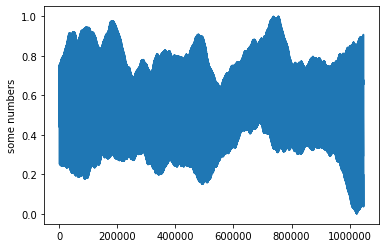

In [231]:
import matplotlib.pyplot as plt
plt.plot(b)
plt.ylabel('some numbers')
plt.show()

In [224]:
list(b)

[0.026816918178328653,
 0.026816918178328653,
 0.026816918178328653,
 0.026816918178328653,
 0.026816918178328653,
 0.026816918178328653,
 0.026816918178328653,
 0.026816918178328653,
 0.026816918178328653,
 0.026816918178328653,
 0.026909449717991363,
 0.02802656691357641,
 0.03049058791286674,
 0.033516155786738944,
 0.03597272503946236,
 0.036937352409201374,
 0.03601164050135974,
 0.033402813117464625,
 0.029768935328987833,
 0.02583032032205579,
 0.022154559082618652,
 0.01968436354600489,
 0.01934176372050489,
 0.02156541274391799,
 0.026098193551783888,
 0.03200338000567293,
 0.037909179780986735,
 0.042481969481056314,
 0.045127664116026756,
 0.04678115692847373,
 0.04877536719162223,
 0.05102658740547161,
 0.052615959855337735,
 0.05251315891991548,
 0.05005682836232128,
 0.045191888873743924,
 0.03846346684380908,
 0.030767703442457606,
 0.02286953228082056,
 0.01525610619330764,
 0.008812057601686796,
 0.004522680034719118,
 0.0029889936903928493,
 0.004183019584771186,
 0.0

In [233]:
l = [
    [1,2,3],
    [4,5,6],
    [6,7,8]
]

In [235]:
abc = ["a","b","c","d","e","f","g","h","i"]

In [240]:
list(zip(*l,*abc))

[(1, 4, 6, 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i')]

In [243]:
for y in range(3):
    for x in range(3):
        x = x
        y = y
        i = x+(y * 3)
        print(abc[i])

a
b
c
d
e
f
g
h
i


In [207]:
help(noise.pnoise3)

Help on built-in function noise3 in module noise._perlin:

noise3(...)
    noise3(x, y, z, octaves=1, persistence=0.5, lacunarity=2.0repeatx=1024, repeaty=1024, repeatz=1024, base=0.0)
    
    return perlin "improved" noise value for specified coordinate
    
    octaves -- specifies the number of passes for generating fBm noise,
    defaults to 1 (simple noise).
    
    persistence -- specifies the amplitude of each successive octave relative
    to the one below it. Defaults to 0.5 (each higher octave's amplitude
    is halved). Note the amplitude of the first pass is always 1.0.
    
    lacunarity -- specifies the frequency of each successive octave relative
    to the one below it, similar to persistence. Defaults to 2.0.
    
    repeatx, repeaty, repeatz -- specifies the interval along each axis when 
    the noise values repeat. This can be used as the tile size for creating 
    tileable textures
    
    base -- specifies a fixed offset for the input coordinates. Useful for